# 準備

## Googleドライブのマウント

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## sys.pathの設定

以下では，Googleドライブのマイドライブ直下にDNN_codeフォルダを置くことを仮定しています．必要に応じて，パスを変更してください．

In [2]:
import sys
sys.path.append('/content/drive/My Drive/DNN_code')
sys.path.append('/content/drive/My Drive/DNN_code/lesson_2')

# overfiting

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.13
                : 10. 正答率(テスト) = 0.1228
Generation: 20. 正答率(トレーニング) = 0.23
                : 20. 正答率(テスト) = 0.1603
Generation: 30. 正答率(トレーニング) = 0.31666666666666665
                : 30. 正答率(テスト) = 0.2205
Generation: 40. 正答率(トレーニング) = 0.5266666666666666
                : 40. 正答率(テスト) = 0.3343
Generation: 50. 正答率(トレーニング) = 0.6466666666666666
                : 50. 正答率(テスト) = 0.4428
Generation: 60. 正答率(トレーニング) = 0.6633333333333333
                : 60. 正答率(テスト) = 0.4694
Generation: 70. 正答率(トレーニング) = 0.6866666666666666
                : 70. 正答率(テスト) = 0.5141
Generation: 80. 正答率(トレーニング) = 0.7233333333333334
                : 80. 正答率(テスト) = 0.5515
Generation: 90. 正答率(トレーニング) = 0.7566666666666667
                : 90. 正答率(テスト) = 0.5784
Generation: 100. 正答率(トレーニング) = 0.78
                : 100. 正答率(テスト) = 0.6007
Generation: 110. 正答率(トレーニング) = 0.7866666666666666
                : 110. 正答率(テスト) = 0.6196
Generation: 120. 正答率(トレーニング) = 0.823333333333333

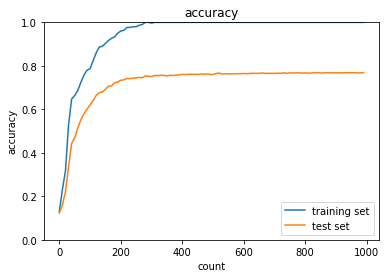

In [3]:
import numpy as np
from collections import OrderedDict
from common import layers
from data.mnist import load_mnist
import matplotlib.pyplot as plt
from multi_layer_net import MultiLayerNet
from common import optimizer


(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)
optimizer = optimizer.SGD(learning_rate=0.01)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10


for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))        

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## weight decay
### L2

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.17333333333333334
                : 10. 正答率(テスト) = 0.1443
Generation: 20. 正答率(トレーニング) = 0.23333333333333334
                : 20. 正答率(テスト) = 0.1856
Generation: 30. 正答率(トレーニング) = 0.29
                : 30. 正答率(テスト) = 0.2352
Generation: 40. 正答率(トレーニング) = 0.44333333333333336
                : 40. 正答率(テスト) = 0.2976
Generation: 50. 正答率(トレーニング) = 0.48
                : 50. 正答率(テスト) = 0.3427
Generation: 60. 正答率(トレーニング) = 0.5333333333333333
                : 60. 正答率(テスト) = 0.3833
Generation: 70. 正答率(トレーニング) = 0.5533333333333333
                : 70. 正答率(テスト) = 0.4102
Generation: 80. 正答率(トレーニング) = 0.5966666666666667
                : 80. 正答率(テスト) = 0.4461
Generation: 90. 正答率(トレーニング) = 0.6266666666666667
                : 90. 正答率(テスト) = 0.4621
Generation: 100. 正答率(トレーニング) = 0.64
                : 100. 正答率(テスト) = 0.4719
Generation: 110. 正答率(トレーニング) = 0.6633333333333333
                : 110. 正答率(テスト) = 0.4929
Generation: 120. 正答率(トレーニング) = 0.6666666666666

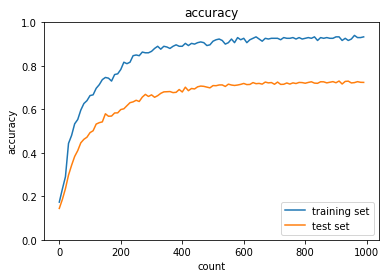

In [4]:
from common import optimizer

(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]


network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)


iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.01

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10
hidden_layer_num = network.hidden_layer_num

# 正則化強度設定 ======================================
weight_decay_lambda = 0.1
# =================================================

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * network.params['W' + str(idx)]
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += 0.5 * weight_decay_lambda * np.sqrt(np.sum(network.params['W' + str(idx)] ** 2))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))               


lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

### L1

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.51
                : 10. 正答率(テスト) = 0.4059
Generation: 20. 正答率(トレーニング) = 0.5566666666666666
                : 20. 正答率(テスト) = 0.4454
Generation: 30. 正答率(トレーニング) = 0.58
                : 30. 正答率(テスト) = 0.4678
Generation: 40. 正答率(トレーニング) = 0.48
                : 40. 正答率(テスト) = 0.4277
Generation: 50. 正答率(トレーニング) = 0.5333333333333333
                : 50. 正答率(テスト) = 0.462
Generation: 60. 正答率(トレーニング) = 0.7833333333333333
                : 60. 正答率(テスト) = 0.611
Generation: 70. 正答率(トレーニング) = 0.8633333333333333
                : 70. 正答率(テスト) = 0.7049
Generation: 80. 正答率(トレーニング) = 0.6933333333333334
                : 80. 正答率(テスト) = 0.5468
Generation: 90. 正答率(トレーニング) = 0.8166666666666667
                : 90. 正答率(テスト) = 0.6589
Generation: 100. 正答率(トレーニング) = 0.6333333333333333
                : 100. 正答率(テスト) = 0.4799
Generation: 110. 正答率(トレーニング) = 0.8466666666666667
                : 110. 正答率(テスト) = 0.6633
Generation: 120. 正答率(トレーニング) = 0.4266666666666667
 

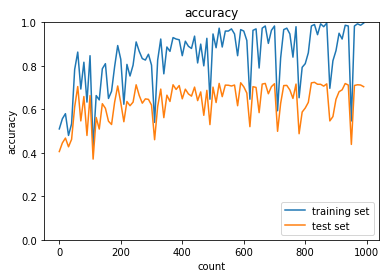

In [5]:
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)


iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.1

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10
hidden_layer_num = network.hidden_layer_num

# 正則化強度設定 ======================================
weight_decay_lambda = 0.005
# =================================================

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * np.sign(network.params['W' + str(idx)])
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += weight_decay_lambda * np.sum(np.abs(network.params['W' + str(idx)]))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))               
                
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

----------------------------------------------------------------------------------------------------------------------------------------
## [try] weigth_decay_lambdaの値を変更して正則化の強さを確認しよう
----------------------------------------------------------------------------------------------------------------------------------------

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.46
                : 10. 正答率(テスト) = 0.3899
Generation: 20. 正答率(トレーニング) = 0.6933333333333334
                : 20. 正答率(テスト) = 0.5453
Generation: 30. 正答率(トレーニング) = 0.7966666666666666
                : 30. 正答率(テスト) = 0.6127
Generation: 40. 正答率(トレーニング) = 0.56
                : 40. 正答率(テスト) = 0.4217
Generation: 50. 正答率(トレーニング) = 0.94
                : 50. 正答率(テスト) = 0.722
Generation: 60. 正答率(トレーニング) = 0.9733333333333334
                : 60. 正答率(テスト) = 0.7476
Generation: 70. 正答率(トレーニング) = 0.9
                : 70. 正答率(テスト) = 0.6902
Generation: 80. 正答率(トレーニング) = 0.9966666666666667
                : 80. 正答率(テスト) = 0.7648
Generation: 90. 正答率(トレーニング) = 1.0
                : 90. 正答率(テスト) = 0.7771
Generation: 100. 正答率(トレーニング) = 1.0
                : 100. 正答率(テスト) = 0.7752
Generation: 110. 正答率(トレーニング) = 1.0
                : 110. 正答率(テスト) = 0.777
Generation: 120. 正答率(トレーニング) = 1.0
                : 120. 正答率(テスト) = 0.777
Generation: 130. 正答率(トレーニング) = 1.0
 

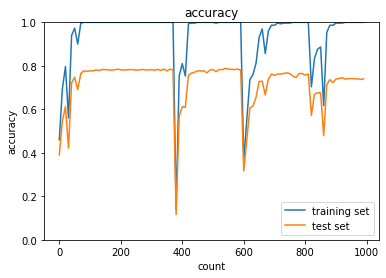

In [10]:
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)


iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.1

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10
hidden_layer_num = network.hidden_layer_num

# 正則化強度設定 ======================================
weight_decay_lambda = 0.001
# =================================================

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * np.sign(network.params['W' + str(idx)])
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += weight_decay_lambda * np.sum(np.abs(network.params['W' + str(idx)]))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))               
                
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## Dropout

In [6]:
class Dropout:
    def __init__(self, dropout_ratio=0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None

    def forward(self, x, train_flg=True):
        if train_flg:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            return x * self.mask
        else:
            return x * (1.0 - self.dropout_ratio)

    def backward(self, dout):
        return dout * self.mask

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.10666666666666667
                : 10. 正答率(テスト) = 0.1062
Generation: 20. 正答率(トレーニング) = 0.11333333333333333
                : 20. 正答率(テスト) = 0.1117
Generation: 30. 正答率(トレーニング) = 0.11666666666666667
                : 30. 正答率(テスト) = 0.1191
Generation: 40. 正答率(トレーニング) = 0.13333333333333333
                : 40. 正答率(テスト) = 0.1412
Generation: 50. 正答率(トレーニング) = 0.21333333333333335
                : 50. 正答率(テスト) = 0.1726
Generation: 60. 正答率(トレーニング) = 0.26
                : 60. 正答率(テスト) = 0.2096
Generation: 70. 正答率(トレーニング) = 0.3
                : 70. 正答率(テスト) = 0.2332
Generation: 80. 正答率(トレーニング) = 0.2866666666666667
                : 80. 正答率(テスト) = 0.2439
Generation: 90. 正答率(トレーニング) = 0.29333333333333333
                : 90. 正答率(テスト) = 0.2486
Generation: 100. 正答率(トレーニング) = 0.31333333333333335
                : 100. 正答率(テスト) = 0.2545
Generation: 110. 正答率(トレーニング) = 0.3233333333333333
                : 110. 正答率(テスト) = 0.2575
Generation: 120. 正答率(トレーニング) 

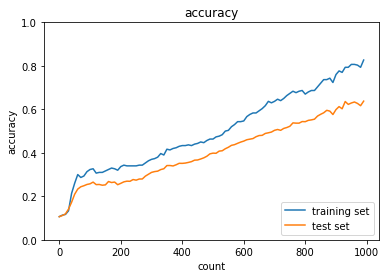

In [7]:
from common import optimizer
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

# ドロップアウト設定 ======================================
use_dropout = True
dropout_ratio = 0.15
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda, use_dropout = use_dropout, dropout_ratio = dropout_ratio)
optimizer = optimizer.SGD(learning_rate=0.01)
# optimizer = optimizer.Momentum(learning_rate=0.01, momentum=0.9)
# optimizer = optimizer.AdaGrad(learning_rate=0.01)
# optimizer = optimizer.Adam()

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10


for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)    
    
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

---------------------------------------------------------------------------------------------------------------------------------------------------------------------
## [try] dropout_ratioの値を変更してみよう

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.12
                : 10. 正答率(テスト) = 0.1009
Generation: 20. 正答率(トレーニング) = 0.11
                : 20. 正答率(テスト) = 0.1021
Generation: 30. 正答率(トレーニング) = 0.13
                : 30. 正答率(テスト) = 0.1075
Generation: 40. 正答率(トレーニング) = 0.19
                : 40. 正答率(テスト) = 0.1342
Generation: 50. 正答率(トレーニング) = 0.22
                : 50. 正答率(テスト) = 0.1698
Generation: 60. 正答率(トレーニング) = 0.21666666666666667
                : 60. 正答率(テスト) = 0.1937
Generation: 70. 正答率(トレーニング) = 0.24666666666666667
                : 70. 正答率(テスト) = 0.2192
Generation: 80. 正答率(トレーニング) = 0.2733333333333333
                : 80. 正答率(テスト) = 0.239
Generation: 90. 正答率(トレーニング) = 0.2966666666666667
                : 90. 正答率(テスト) = 0.2488
Generation: 100. 正答率(トレーニング) = 0.32666666666666666
                : 100. 正答率(テスト) = 0.2576
Generation: 110. 正答率(トレーニング) = 0.36
                : 110. 正答率(テスト) = 0.2759
Generation: 120. 正答率(トレーニング) = 0.37333333333333335
                : 120. 正答率(テスト) = 0.28

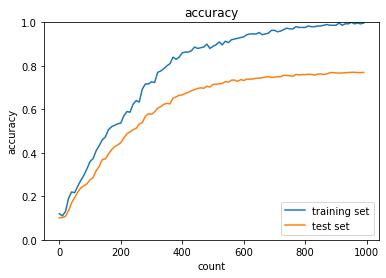

In [11]:
from common import optimizer
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

# ドロップアウト設定 ======================================
use_dropout = True
dropout_ratio = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda, use_dropout = use_dropout, dropout_ratio = dropout_ratio)
optimizer = optimizer.SGD(learning_rate=0.01)
# optimizer = optimizer.Momentum(learning_rate=0.01, momentum=0.9)
# optimizer = optimizer.AdaGrad(learning_rate=0.01)
# optimizer = optimizer.Adam()

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10


for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)    
    
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.08333333333333333
                : 10. 正答率(テスト) = 0.0767
Generation: 20. 正答率(トレーニング) = 0.10666666666666667
                : 20. 正答率(テスト) = 0.0805
Generation: 30. 正答率(トレーニング) = 0.10333333333333333
                : 30. 正答率(テスト) = 0.0873
Generation: 40. 正答率(トレーニング) = 0.10666666666666667
                : 40. 正答率(テスト) = 0.0938
Generation: 50. 正答率(トレーニング) = 0.11666666666666667
                : 50. 正答率(テスト) = 0.0977
Generation: 60. 正答率(トレーニング) = 0.12333333333333334
                : 60. 正答率(テスト) = 0.1028
Generation: 70. 正答率(トレーニング) = 0.13333333333333333
                : 70. 正答率(テスト) = 0.1099
Generation: 80. 正答率(トレーニング) = 0.14666666666666667
                : 80. 正答率(テスト) = 0.1213
Generation: 90. 正答率(トレーニング) = 0.15
                : 90. 正答率(テスト) = 0.1319
Generation: 100. 正答率(トレーニング) = 0.16
                : 100. 正答率(テスト) = 0.1466
Generation: 110. 正答率(トレーニング) = 0.16666666666666666
                : 110. 正答率(テスト) = 0.1483
Generation: 120. 正答率(トレーニン

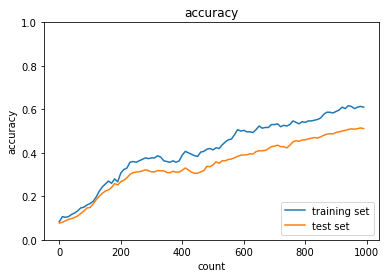

In [12]:
from common import optimizer
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

# ドロップアウト設定 ======================================
use_dropout = True
dropout_ratio = 0.20
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda, use_dropout = use_dropout, dropout_ratio = dropout_ratio)
optimizer = optimizer.SGD(learning_rate=0.01)
# optimizer = optimizer.Momentum(learning_rate=0.01, momentum=0.9)
# optimizer = optimizer.AdaGrad(learning_rate=0.01)
# optimizer = optimizer.Adam()

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10


for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)    
    
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## [try] optimizerとdropout_ratioの値を変更してみよう
---------------------------------------------------------------------------------------------------------------------------------------------------------------------

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.16
                : 10. 正答率(テスト) = 0.1695
Generation: 20. 正答率(トレーニング) = 0.3
                : 20. 正答率(テスト) = 0.2674
Generation: 30. 正答率(トレーニング) = 0.2833333333333333
                : 30. 正答率(テスト) = 0.2497
Generation: 40. 正答率(トレーニング) = 0.3233333333333333
                : 40. 正答率(テスト) = 0.2777
Generation: 50. 正答率(トレーニング) = 0.37333333333333335
                : 50. 正答率(テスト) = 0.3051
Generation: 60. 正答率(トレーニング) = 0.45666666666666667
                : 60. 正答率(テスト) = 0.3482
Generation: 70. 正答率(トレーニング) = 0.52
                : 70. 正答率(テスト) = 0.409
Generation: 80. 正答率(トレーニング) = 0.54
                : 80. 正答率(テスト) = 0.4564
Generation: 90. 正答率(トレーニング) = 0.5533333333333333
                : 90. 正答率(テスト) = 0.4683
Generation: 100. 正答率(トレーニング) = 0.5866666666666667
                : 100. 正答率(テスト) = 0.4944
Generation: 110. 正答率(トレーニング) = 0.6166666666666667
                : 110. 正答率(テスト) = 0.5278
Generation: 120. 正答率(トレーニング) = 0.6466666666666666
             

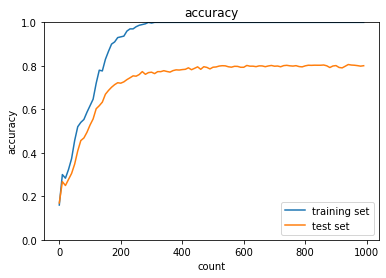

In [13]:
from common import optimizer
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

# ドロップアウト設定 ======================================
use_dropout = True
dropout_ratio = 0.20
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda, use_dropout = use_dropout, dropout_ratio = dropout_ratio)
# optimizer = optimizer.SGD(learning_rate=0.01)
optimizer = optimizer.Momentum(learning_rate=0.01, momentum=0.9)
# optimizer = optimizer.AdaGrad(learning_rate=0.01)
# optimizer = optimizer.Adam()

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10


for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)    
    
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.51
                : 10. 正答率(テスト) = 0.433
Generation: 20. 正答率(トレーニング) = 0.71
                : 20. 正答率(テスト) = 0.5695
Generation: 30. 正答率(トレーニング) = 0.7766666666666666
                : 30. 正答率(テスト) = 0.6401
Generation: 40. 正答率(トレーニング) = 0.8733333333333333
                : 40. 正答率(テスト) = 0.7115
Generation: 50. 正答率(トレーニング) = 0.93
                : 50. 正答率(テスト) = 0.733
Generation: 60. 正答率(トレーニング) = 0.9666666666666667
                : 60. 正答率(テスト) = 0.7599
Generation: 70. 正答率(トレーニング) = 0.9833333333333333
                : 70. 正答率(テスト) = 0.7555
Generation: 80. 正答率(トレーニング) = 0.9866666666666667
                : 80. 正答率(テスト) = 0.7791
Generation: 90. 正答率(トレーニング) = 0.99
                : 90. 正答率(テスト) = 0.778
Generation: 100. 正答率(トレーニング) = 0.9966666666666667
                : 100. 正答率(テスト) = 0.7885
Generation: 110. 正答率(トレーニング) = 1.0
                : 110. 正答率(テスト) = 0.7928
Generation: 120. 正答率(トレーニング) = 1.0
                : 120. 正答率(テスト) = 0.7961
Gener

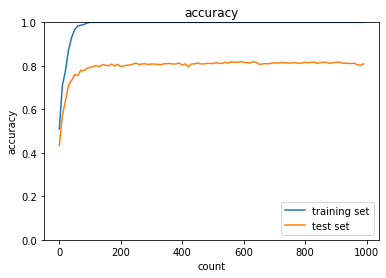

In [14]:
from common import optimizer
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

# ドロップアウト設定 ======================================
use_dropout = True
dropout_ratio = 0.20
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda, use_dropout = use_dropout, dropout_ratio = dropout_ratio)
# optimizer = optimizer.SGD(learning_rate=0.01)
# optimizer = optimizer.Momentum(learning_rate=0.01, momentum=0.9)
optimizer = optimizer.AdaGrad(learning_rate=0.01)
# optimizer = optimizer.Adam()

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10


for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)    
    
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.2633333333333333
                : 10. 正答率(テスト) = 0.2261
Generation: 20. 正答率(トレーニング) = 0.30666666666666664
                : 20. 正答率(テスト) = 0.2491
Generation: 30. 正答率(トレーニング) = 0.39666666666666667
                : 30. 正答率(テスト) = 0.3335
Generation: 40. 正答率(トレーニング) = 0.52
                : 40. 正答率(テスト) = 0.4542
Generation: 50. 正答率(トレーニング) = 0.6733333333333333
                : 50. 正答率(テスト) = 0.5452
Generation: 60. 正答率(トレーニング) = 0.7566666666666667
                : 60. 正答率(テスト) = 0.5904
Generation: 70. 正答率(トレーニング) = 0.88
                : 70. 正答率(テスト) = 0.7002
Generation: 80. 正答率(トレーニング) = 0.8966666666666666
                : 80. 正答率(テスト) = 0.7149
Generation: 90. 正答率(トレーニング) = 0.9466666666666667
                : 90. 正答率(テスト) = 0.7404
Generation: 100. 正答率(トレーニング) = 0.9533333333333334
                : 100. 正答率(テスト) = 0.7572
Generation: 110. 正答率(トレーニング) = 0.9733333333333334
                : 110. 正答率(テスト) = 0.7685
Generation: 120. 正答率(トレーニング) = 0.

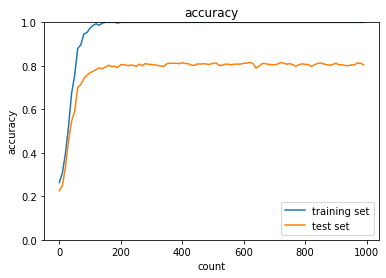

In [15]:
from common import optimizer
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

# ドロップアウト設定 ======================================
use_dropout = True
dropout_ratio = 0.20
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda, use_dropout = use_dropout, dropout_ratio = dropout_ratio)
# optimizer = optimizer.SGD(learning_rate=0.01)
# optimizer = optimizer.Momentum(learning_rate=0.01, momentum=0.9)
# optimizer = optimizer.AdaGrad(learning_rate=0.01)
optimizer = optimizer.Adam()

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10


for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)    
    
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## Dropout + L1

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.11666666666666667
                : 10. 正答率(テスト) = 0.1014
Generation: 20. 正答率(トレーニング) = 0.13
                : 20. 正答率(テスト) = 0.1137
Generation: 30. 正答率(トレーニング) = 0.14666666666666667
                : 30. 正答率(テスト) = 0.123
Generation: 40. 正答率(トレーニング) = 0.19
                : 40. 正答率(テスト) = 0.1402
Generation: 50. 正答率(トレーニング) = 0.22333333333333333
                : 50. 正答率(テスト) = 0.1574
Generation: 60. 正答率(トレーニング) = 0.26
                : 60. 正答率(テスト) = 0.1757
Generation: 70. 正答率(トレーニング) = 0.2966666666666667
                : 70. 正答率(テスト) = 0.1946
Generation: 80. 正答率(トレーニング) = 0.33666666666666667
                : 80. 正答率(テスト) = 0.2223
Generation: 90. 正答率(トレーニング) = 0.35333333333333333
                : 90. 正答率(テスト) = 0.2362
Generation: 100. 正答率(トレーニング) = 0.38666666666666666
                : 100. 正答率(テスト) = 0.2663
Generation: 110. 正答率(トレーニング) = 0.4
                : 110. 正答率(テスト) = 0.2904
Generation: 120. 正答率(トレーニング) = 0.45
                : 120. 

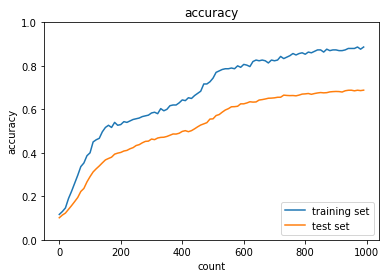

In [8]:
from common import optimizer
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

# ドロップアウト設定 ======================================
use_dropout = True
dropout_ratio = 0.08
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        use_dropout = use_dropout, dropout_ratio = dropout_ratio)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.01

train_loss_list = []
accuracies_train = []
accuracies_test = []
hidden_layer_num = network.hidden_layer_num

plot_interval=10

# 正則化強度設定 ======================================
weight_decay_lambda=0.004
# =================================================

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * np.sign(network.params['W' + str(idx)])
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += weight_decay_lambda * np.sum(np.abs(network.params['W' + str(idx)]))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))               
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()